# Machine Learning

## Topic : Telephone Company Customer Churn 

## Introduction

With mega-corporations like Amazon, Target, and Walmart dominating e-commerce and the greater retail industry alike, customer retention is, arguably, more important for smaller businesses than ever as this metric is fundamental to a companies success.

Customer retention refers to the rate at which customers stay with a business in a given period of time. This is often referred to as churn rate and is a key metric for practically all B2B and B2C businesses. In general, the lower the churn, the more loyal the customers and more successful the business, as the business retains more customers over time.

In this project, we will look to build the best model for predicting customer churn and analyze what the contributing factors to a customers decision to churn are. The Telco customer churn data that we will use contains information about a fictional telecommunications company that provided home phone and Internet services to 7043 customers in California over a 3 month period.

**Data Source :**
> **[Kaggle Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)**

## Required Libraries ... 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import shap
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

import warnings
import time
%load_ext watermark

In [2]:
warnings.filterwarnings("ignore")

## Dataset :

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Descriptive Analysis

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It appears we have no missing values but the 'TotalCharges' column is being listed as an object type when it should be numeric.<br> 
We will need to change this before moving forward for the sake of visualization as well as for building our model. 

In [7]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It appears we do have some null values after all, as there are 11 missing values in the aforementioned 'TotalCharges' column. We will take a closer look at these columns. 

In [8]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The columns with empty values in the 'TotalCharges' column also have 0 for the 'tenure' column. 

In [9]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Since these are the only columns with 0 for 'tenure', these will be dropped as doing this won't affect the data. 

In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

Now we can safely change our 'TotalCharges' data to numeric. 

In [11]:
pd.to_numeric(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


## Exploratory Analysis

### Univariate Analysis

In this section we will look at the counts and distributions for each individual feature in our dataset. 

In [13]:
categorical = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
continuous = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]
target = ["Churn"]
print("The categorial variables are : ", categorical)
print("The continuous variables are : ", continuous)
print("The target variable is :  ", target)

The categorial variables are :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
The continuous variables are :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
The target variable is :   ['Churn']


[Text(0, 0, '2425'), Text(0, 0, '3087'), Text(0, 0, '1520')]

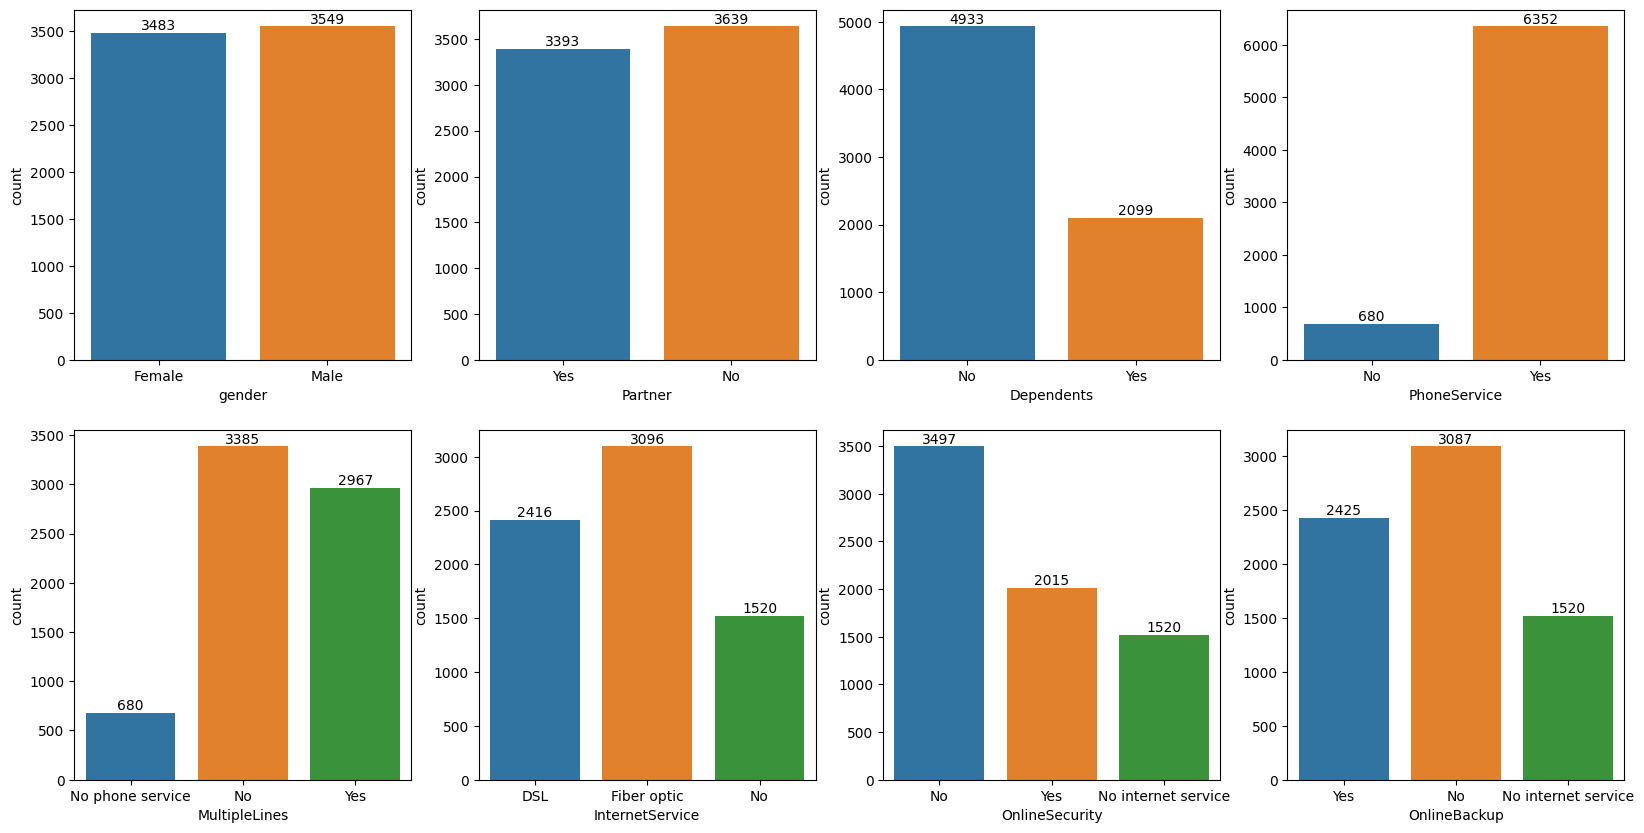

In [14]:
fig = plt.figure(figsize=(20,10))
grid = fig.add_gridspec(2,4)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x=categorical[0], ax=ax0)
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x=categorical[1], ax=ax1)
ax1.bar_label(ax1.containers[0])

ax2 = fig.add_subplot(grid[0,2])
sns.countplot(data=df, x=categorical[2], ax=ax2)
ax2.bar_label(ax2.containers[0])

ax3 = fig.add_subplot(grid[0,3])
sns.countplot(data=df, x=categorical[3], ax=ax3)
ax3.bar_label(ax3.containers[0])

ax4 = fig.add_subplot(grid[1,0])
sns.countplot(data=df, x=categorical[4], ax=ax4)
ax4.bar_label(ax4.containers[0])

ax5 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x=categorical[5], ax=ax5)
ax5.bar_label(ax5.containers[0])

ax6 = fig.add_subplot(grid[1,2])
sns.countplot(data=df, x=categorical[6], ax=ax6)
ax6.bar_label(ax6.containers[0])

ax7 = fig.add_subplot(grid[1,3])
sns.countplot(data=df, x=categorical[7], ax=ax7)
ax7.bar_label(ax7.containers[0])

# plt.tight_layout()

[Text(0, 0, 'Electronic \nCheck'),
 Text(1, 0, 'Mailed \nCheck'),
 Text(2, 0, 'Bank \ntransfer \n(automatic)'),
 Text(3, 0, 'Credit \ncard \n(automatic)')]

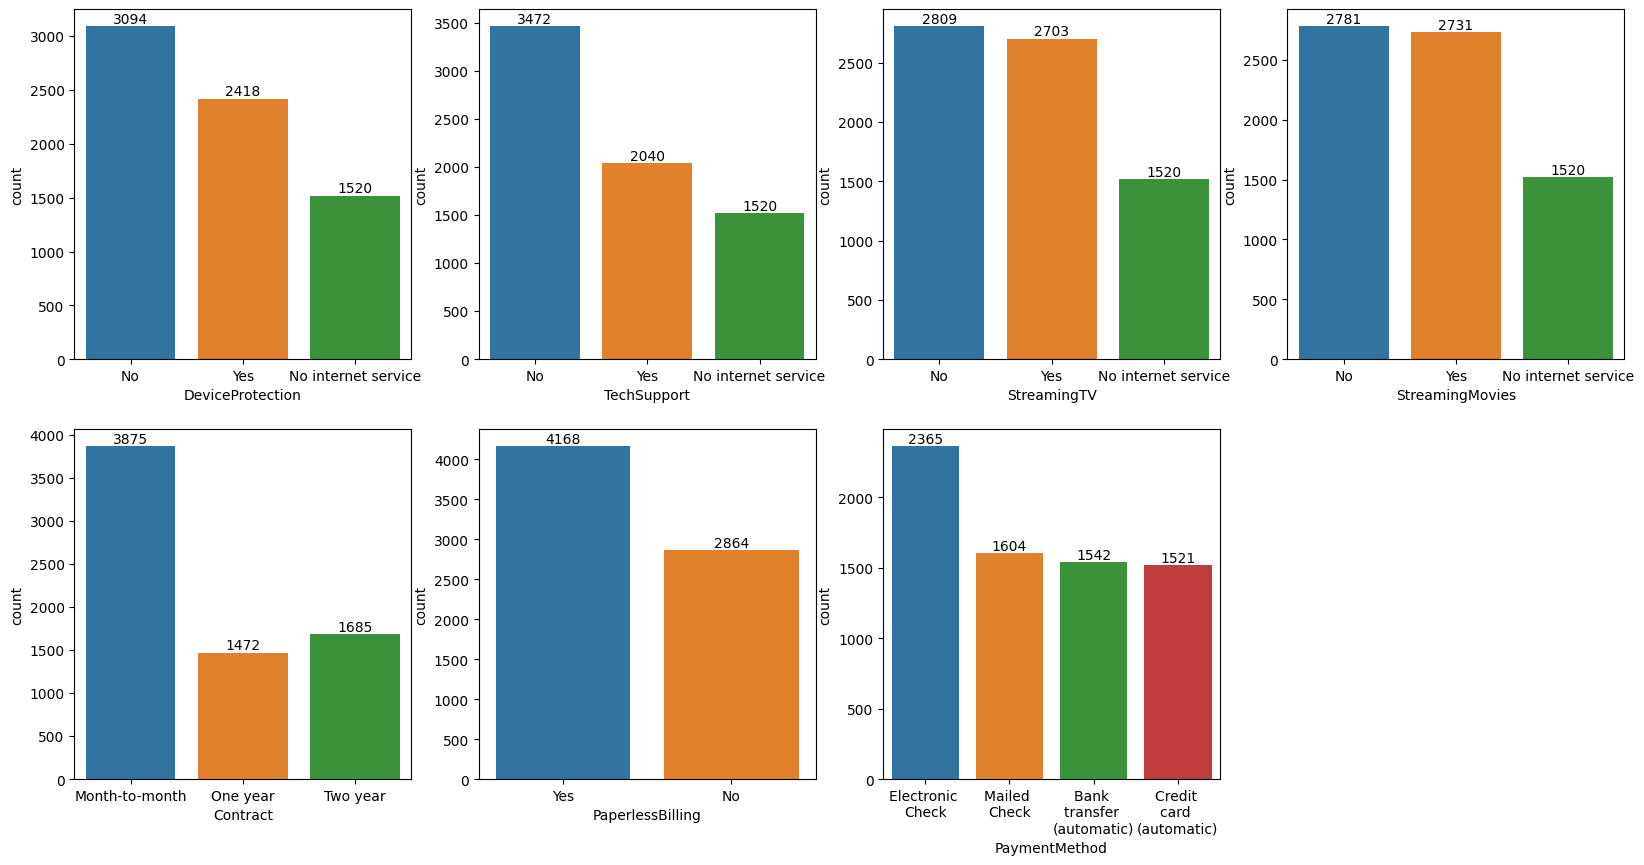

In [15]:
fig = plt.figure(figsize=(20,10))
grid = fig.add_gridspec(2,4)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x=categorical[8], ax=ax0)
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x=categorical[9], ax=ax1)
ax1.bar_label(ax1.containers[0])

ax2 = fig.add_subplot(grid[0,2])
sns.countplot(data=df, x=categorical[10], ax=ax2)
ax2.bar_label(ax2.containers[0])

ax3 = fig.add_subplot(grid[0,3])
sns.countplot(data=df, x=categorical[11], ax=ax3)
ax3.bar_label(ax3.containers[0])

ax4 = fig.add_subplot(grid[1,0])
sns.countplot(data=df, x=categorical[12], ax=ax4)
ax4.bar_label(ax4.containers[0])

ax5 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x=categorical[13], ax=ax5)
ax5.bar_label(ax5.containers[0])

ax6 = fig.add_subplot(grid[1,2])
sns.countplot(data=df, x=categorical[14], ax=ax6)
ax6.bar_label(ax6.containers[0])
ax6.set_xticklabels(["Electronic \nCheck", "Mailed \nCheck", "Bank \ntransfer \n(automatic)","Credit \ncard \n(automatic)"])

# ax7 = fig.add_subplot(grid[1,3])
# sns.histplot(data=df, x=categorical[15], ax=ax7)
# ax7.bar_label(ax7.containers[0])

# plt.tight_layout()

[Text(0, 0, '5163'), Text(0, 0, '1869')]

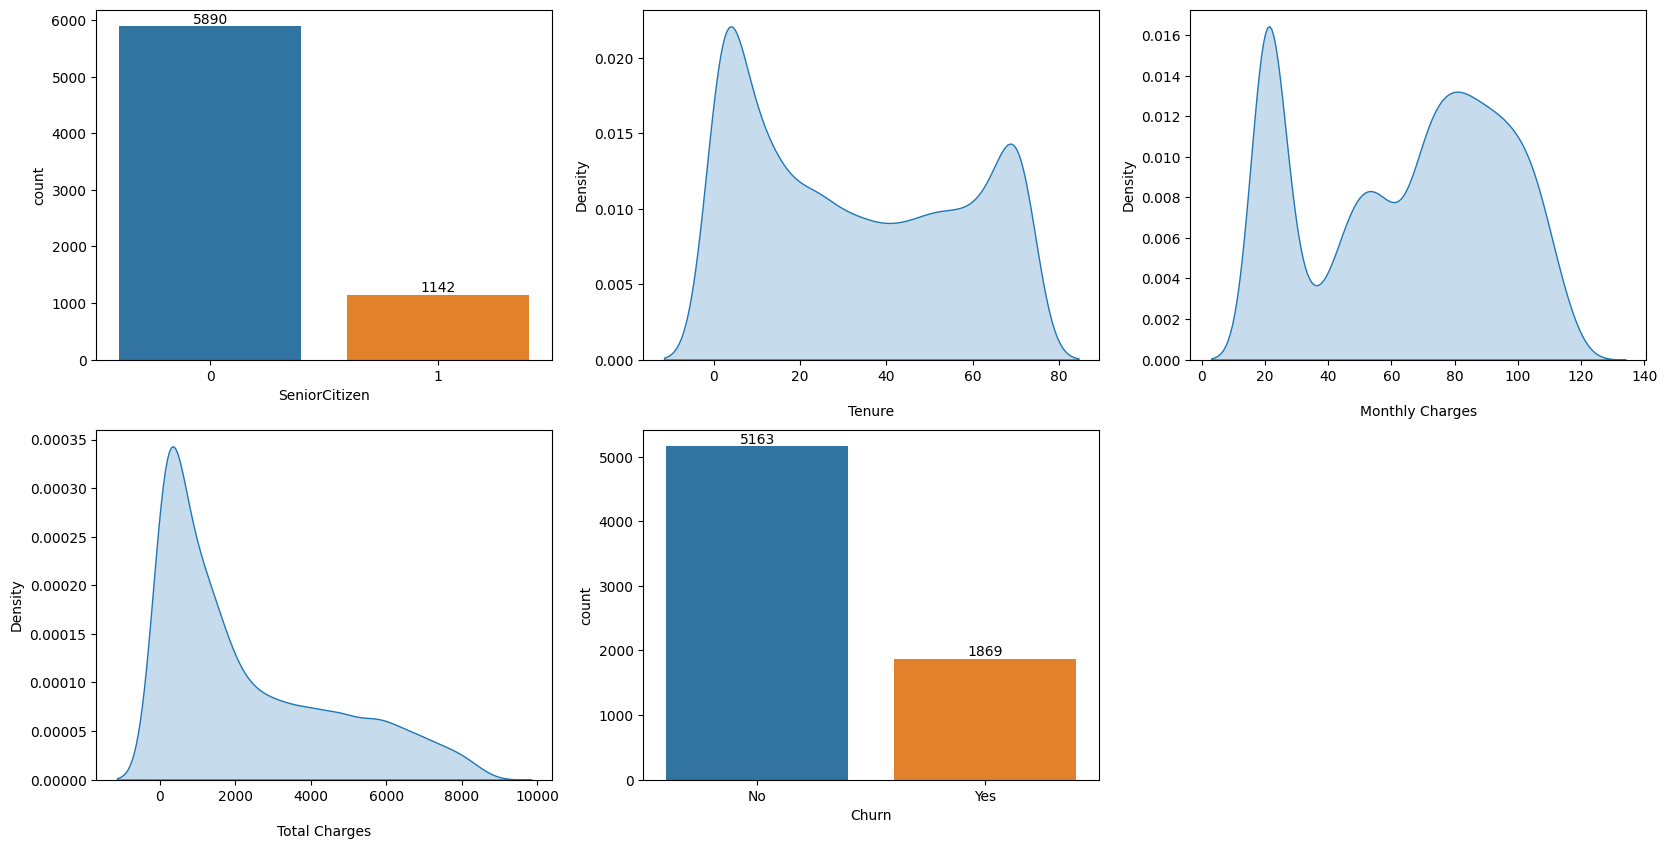

In [16]:
fig = plt.figure(figsize=(20,10))
grid = fig.add_gridspec(2,3)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x=continuous[0], ax=ax0)
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.kdeplot(x=df[continuous[1]], shade=True, ax=ax1)
ax1.set_xlabel('\nTenure')

ax2 = fig.add_subplot(grid[0,2])
sns.kdeplot(x=df[continuous[2]], shade=True, ax=ax2)
ax2.set_xlabel('\nMonthly Charges')

ax3 = fig.add_subplot(grid[1,0])
sns.kdeplot(x=df[continuous[3]], shade=True, ax=ax3)
ax3.set_xlabel('\nTotal Charges')

ax4 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x='Churn', ax=ax4)
ax4.bar_label(ax4.containers[0])

# plt.tight_layout()

#### Summary 

Through our univariate analysis we learn : <br> 
> * Male and Female customers are almost equally represented in our data as there are only 67 more men than women. 
> * Customers with partners in their lives are also close in numbers to singles. Singles account for 3641 rows of data compared to 3402 for coupled customers. 
> * The vast majority of participants have both phone and internet service. 
> * A nearly equal number of people opt-in for streaming capabilities for both TV and  movies. 
> * The majority of customers are on a month-to-month contract and prefer to pay by electronic check. 
> * Most customers have a tenure with the company of under 3 years (36 months).
> * The distribution of monthly charges is bimodal with the majority of customers paying under $40/month and another large group paying \\$70+.
> * Most customers are not churning which bodes well for the company. 

### Multivariate Analysis

Now we will relate a number of features to each other. 

Text(0.5, 1.0, 'Churn by Dependents')

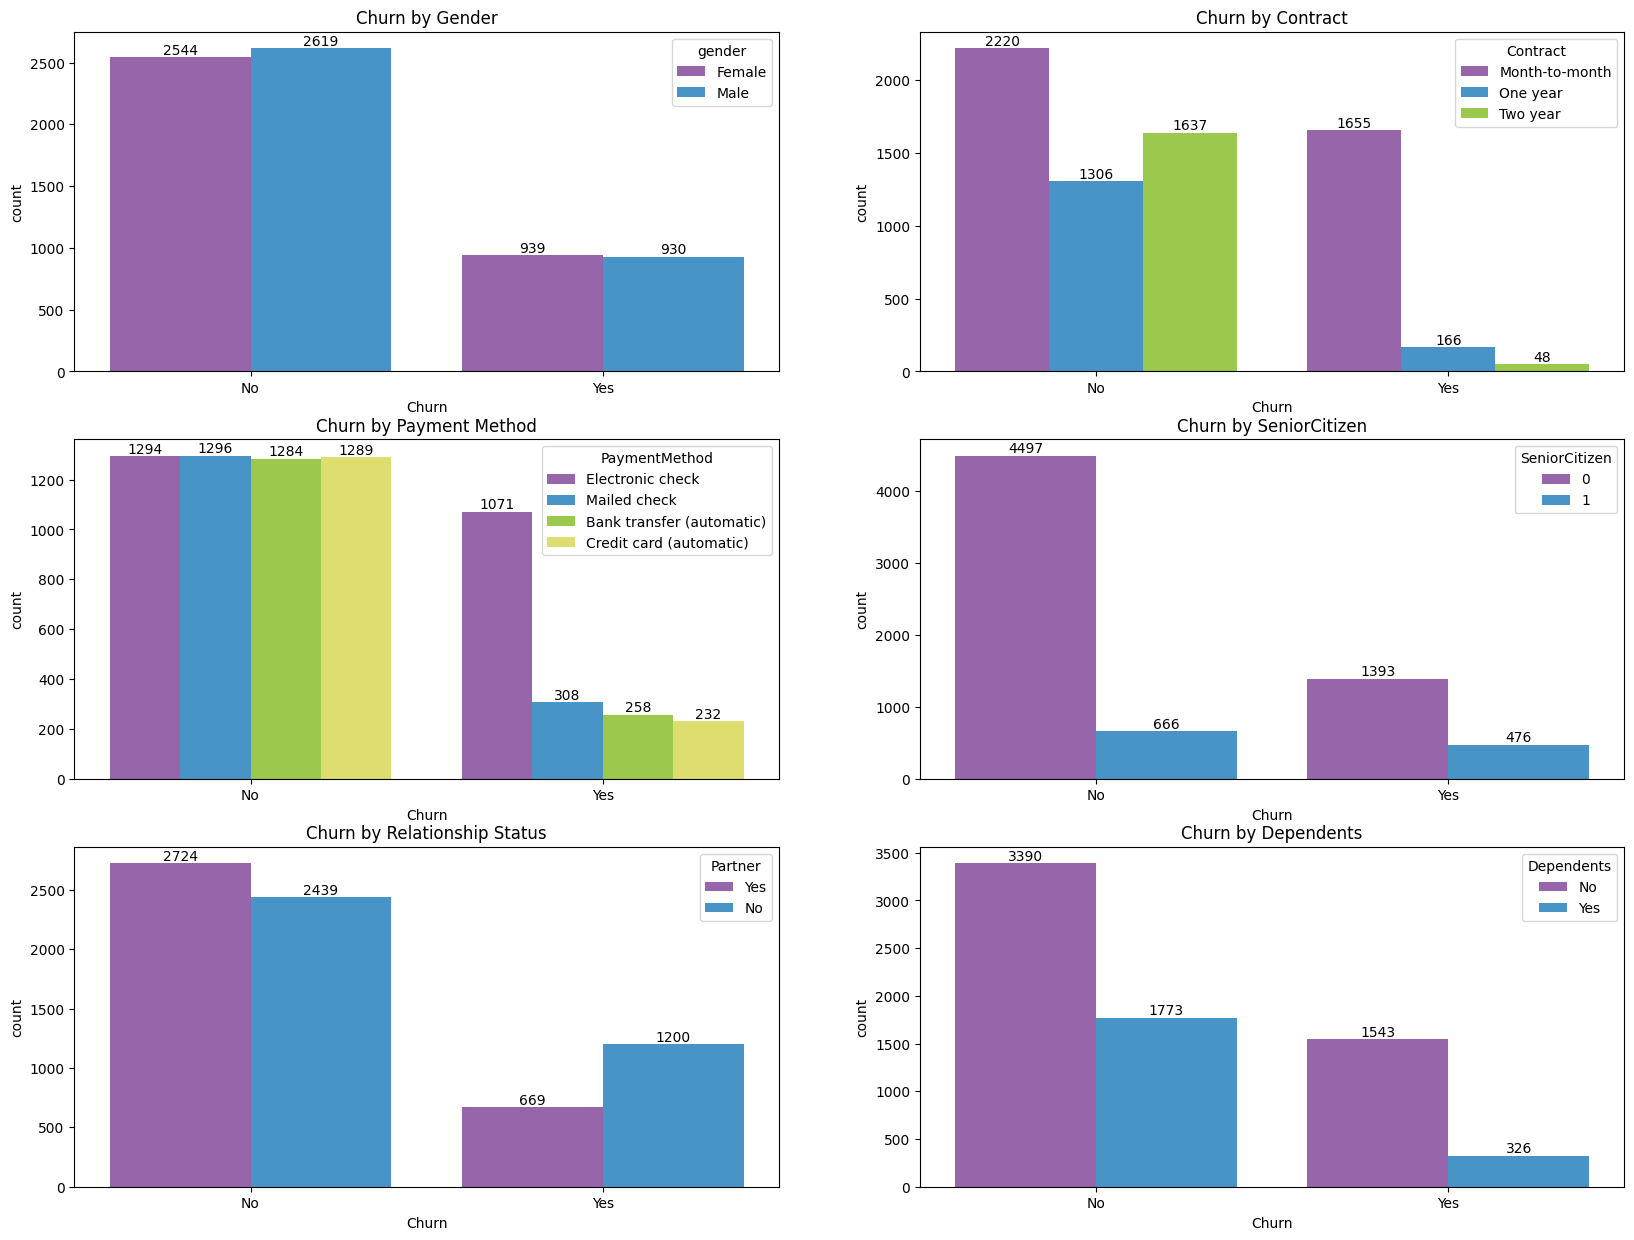

In [17]:
fig = plt.figure(figsize=(20,15))
grid = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x='Churn', hue='gender',palette=["#9b59b6", "#3498db"],ax=ax0)
for container in ax0.containers:
    ax0.bar_label(container)
# ax0.legend(frameon=False)
ax0.set_title('Churn by Gender')
    
ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x='Churn', hue='Contract',palette=["#9b59b6", "#3498db",'#9FDD3A'],ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
# ax1.legend(frameon=False)
ax1.set_title('Churn by Contract')

ax2 = fig.add_subplot(grid[1,0])
sns.countplot(data=df, x='Churn', hue='PaymentMethod',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)
# ax2.legend(frameon=False)
ax2.set_title('Churn by Payment Method')

ax3 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x='Churn', hue='SeniorCitizen',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax3)
for container in ax3.containers:
    ax3.bar_label(container)
# ax3.legend(frameon=False)
ax3.set_title('Churn by SeniorCitizen')

ax4 = fig.add_subplot(grid[2,0])
sns.countplot(data=df, x='Churn', hue='Partner',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax4)
for container in ax4.containers:
    ax4.bar_label(container)
# ax3.legend(frameon=False)
ax4.set_title('Churn by Relationship Status')

ax5 = fig.add_subplot(grid[2,1])
sns.countplot(data=df, x='Churn', hue='Dependents',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax5)
for container in ax5.containers:
    ax5.bar_label(container)
# ax3.legend(frameon=False)
ax5.set_title('Churn by Dependents')

Text(0.5, 1.0, 'Churn by Multiple Lines')

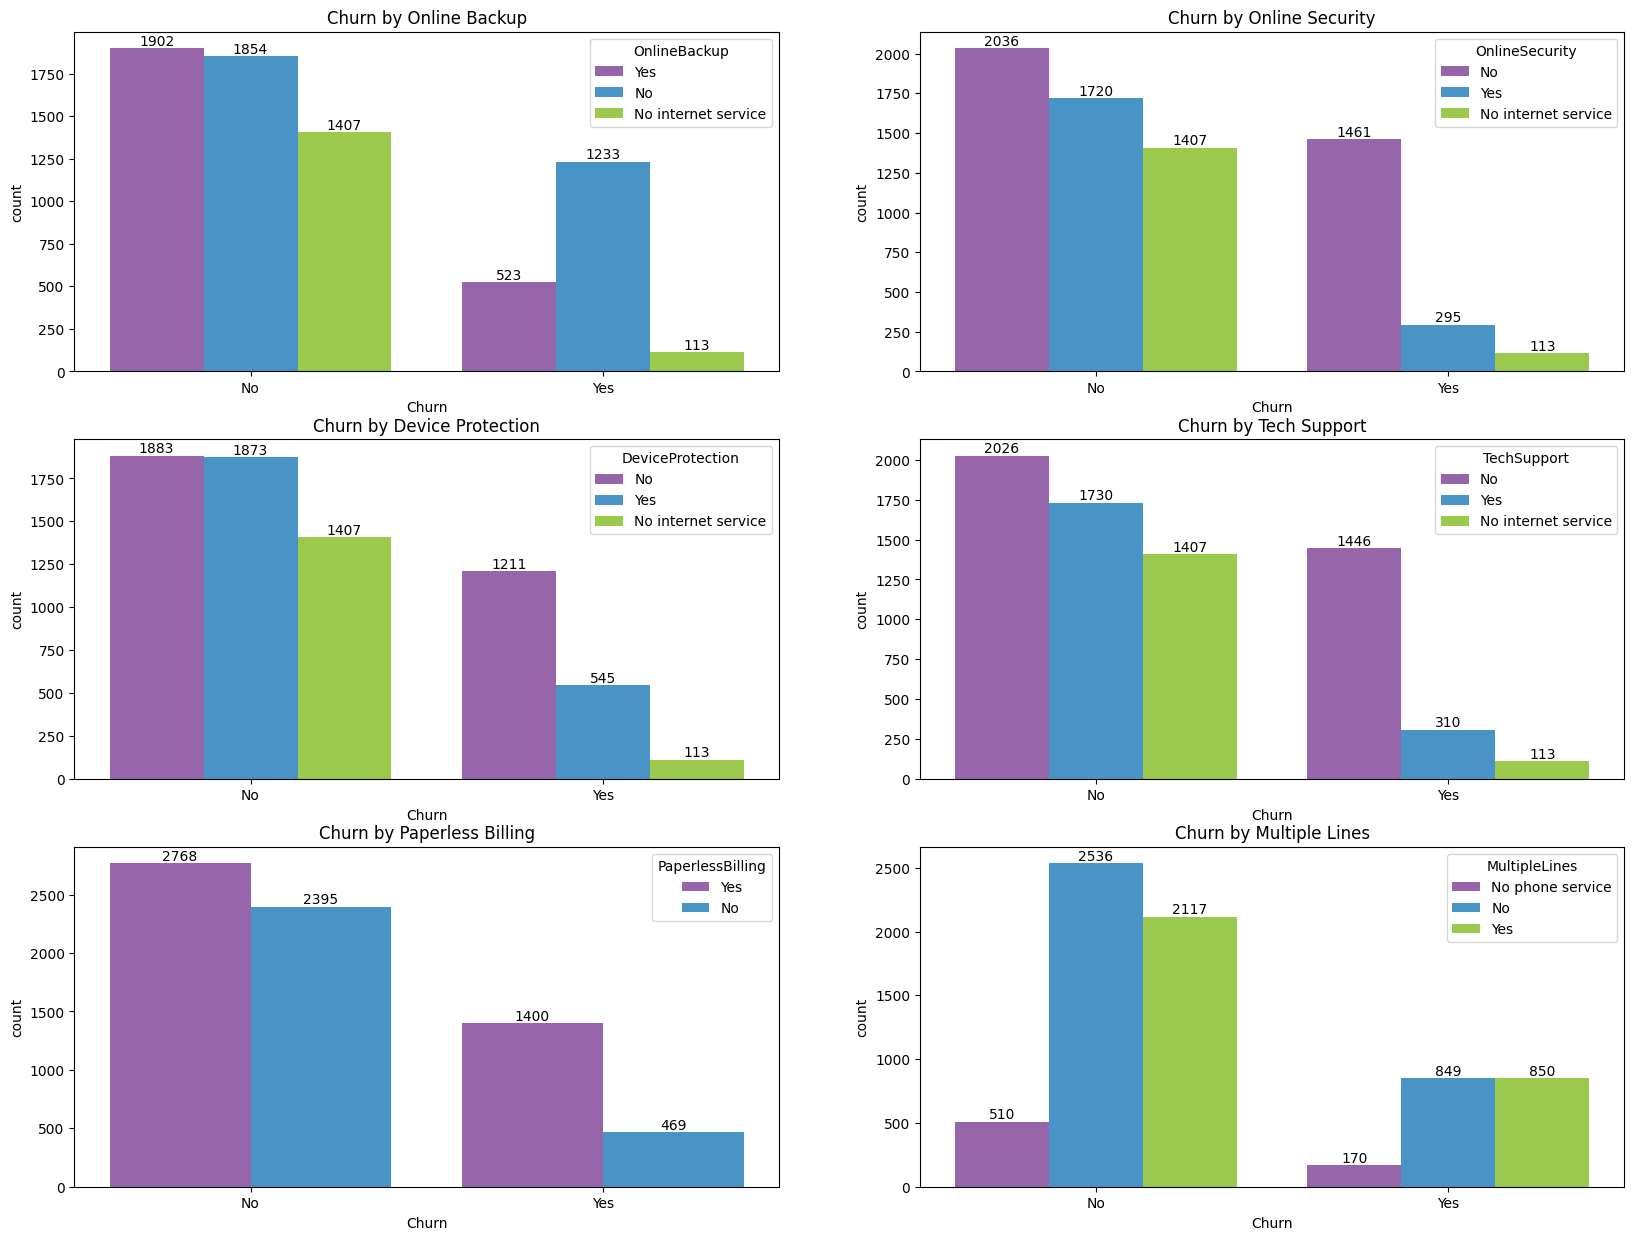

In [18]:
fig = plt.figure(figsize=(20,15))
grid = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x='Churn', hue='OnlineBackup',palette=["#9b59b6", "#3498db","#9FDD3A"],ax=ax0)
for container in ax0.containers:
    ax0.bar_label(container)
# ax0.legend(frameon=False)
ax0.set_title('Churn by Online Backup')
    
ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x='Churn', hue='OnlineSecurity',palette=["#9b59b6", "#3498db",'#9FDD3A'],ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
# ax1.legend(frameon=False)
ax1.set_title('Churn by Online Security')

ax2 = fig.add_subplot(grid[1,0])
sns.countplot(data=df, x='Churn', hue='DeviceProtection',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)
# ax2.legend(frameon=False)
ax2.set_title('Churn by Device Protection')

ax3 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x='Churn', hue='TechSupport',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax3)
for container in ax3.containers:
    ax3.bar_label(container)
# ax3.legend(frameon=False)
ax3.set_title('Churn by Tech Support')

ax4 = fig.add_subplot(grid[2,0])
sns.countplot(data=df, x='Churn', hue='PaperlessBilling',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax4)
for container in ax4.containers:
    ax4.bar_label(container)
# ax3.legend(frameon=False)
ax4.set_title('Churn by Paperless Billing')

ax5 = fig.add_subplot(grid[2,1])
sns.countplot(data=df, x='Churn', hue='MultipleLines',palette=["#9b59b6", "#3498db",'#9FDD3A','#F0F05E'],ax=ax5)
for container in ax5.containers:
    ax5.bar_label(container)
# ax3.legend(frameon=False)
ax5.set_title('Churn by Multiple Lines')

Text(0.5, 1.0, 'Churn by Tenure')

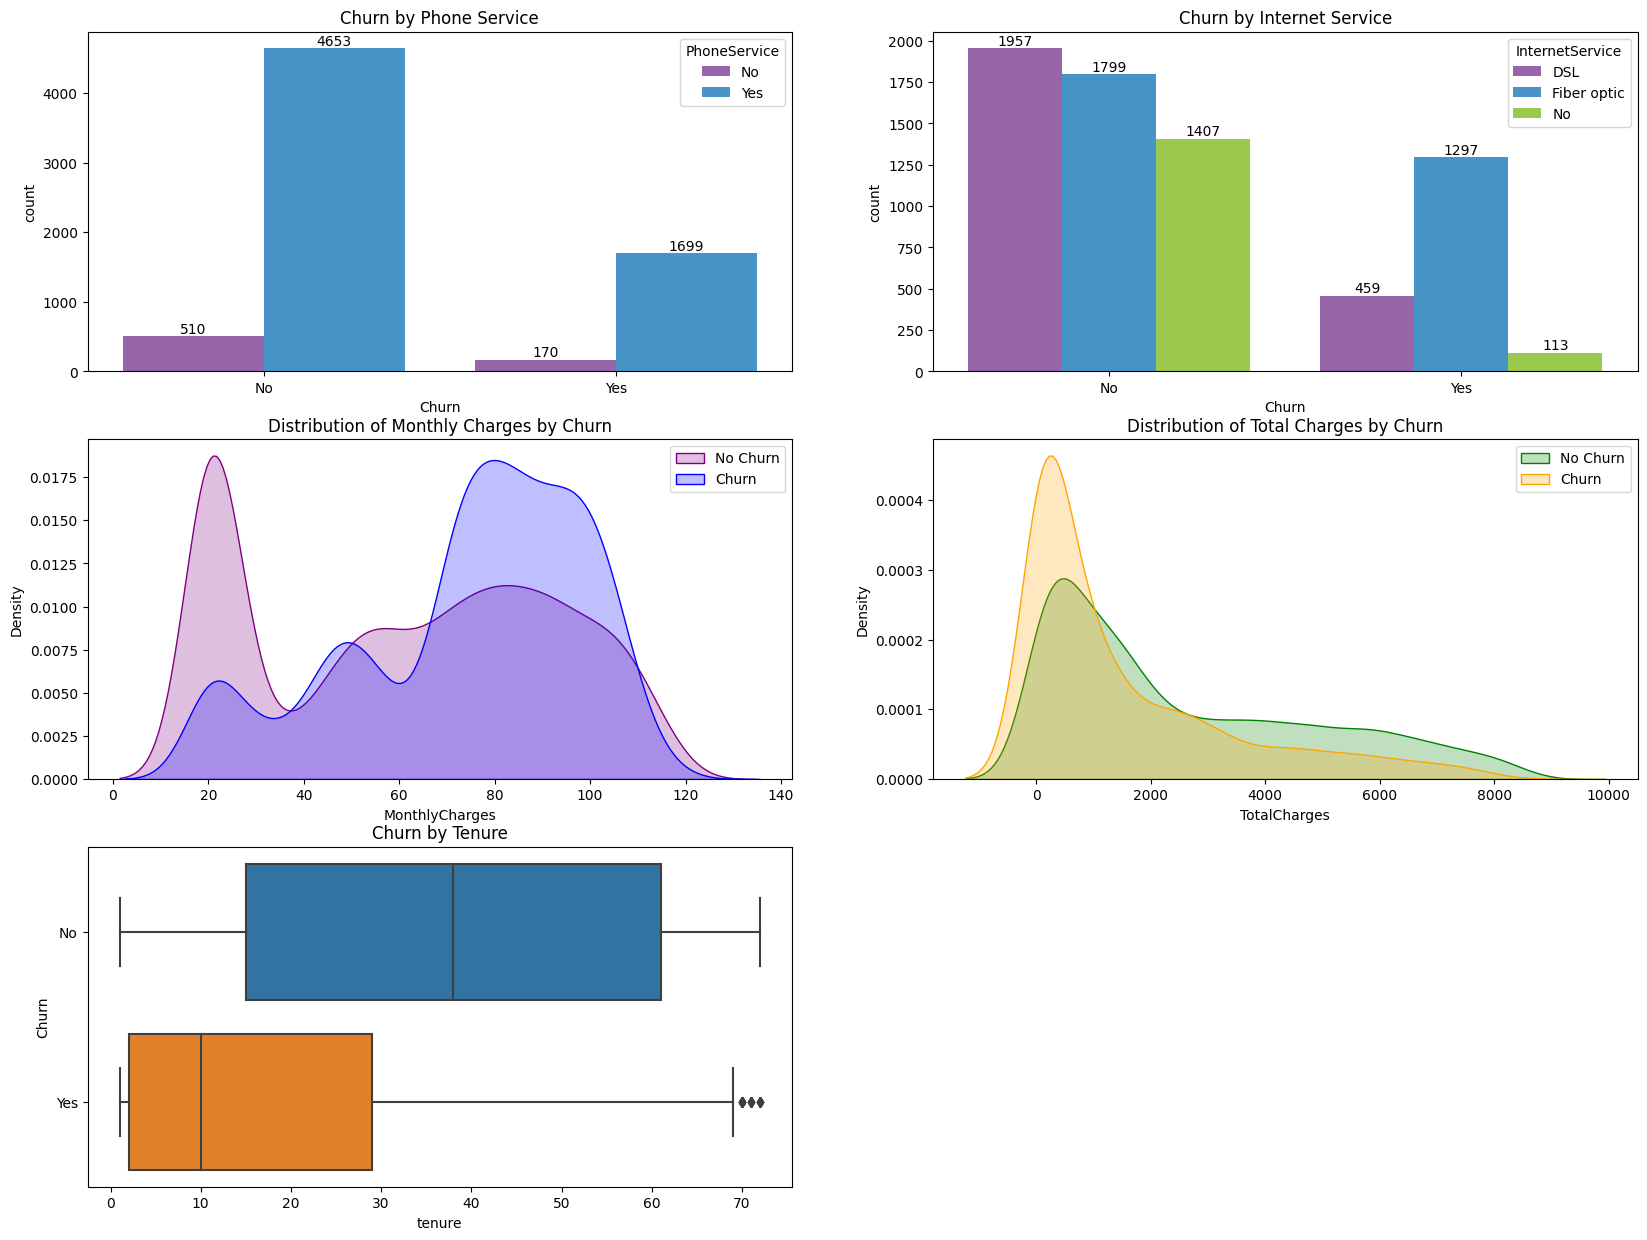

In [19]:
fig = plt.figure(figsize=(20,15))
grid = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x='Churn', hue='PhoneService',palette=["#9b59b6", "#3498db"],ax=ax0)
for container in ax0.containers:
    ax0.bar_label(container)
# ax0.legend(frameon=False)
ax0.set_title('Churn by Phone Service')
    
ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x='Churn', hue='InternetService',palette=["#9b59b6", "#3498db",'#9FDD3A'],ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
# ax1.legend(frameon=False)
ax1.set_title('Churn by Internet Service')

ax2 = fig.add_subplot(grid[1,0])
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], ax=ax2, color="Purple", shade = True, label='No Churn');
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], ax = ax2, color="Blue", shade= True, label='Churn')
# for container in ax2.containers:
#     ax2.bar_label(container)
# ax2.legend(frameon=False)
plt.legend()
ax2.set_title('Distribution of Monthly Charges by Churn')

ax3 = fig.add_subplot(grid[1,1])
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], color="Green", shade = True, label= 'No Churn');
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ], color="Orange", shade= True, label= 'Churn')
# for container in ax2.containers:
#     ax2.bar_label(container)
# ax2.legend(frameon=False)
plt.legend()
ax3.set_title('Distribution of Total Charges by Churn')

ax4 = fig.add_subplot(grid[2,0])
sns.boxplot(x=df['tenure'],y=df['Churn'])
ax4.set_title('Churn by Tenure')

# plt.tight_layout()

#### Summary

Through our multivariate analysis we learn : 
> * Men and Women churn at practically the same rate. 
> * People with month-to-month contracts churned at much higher numbers than those with contracts, implying that the contracts are binding to some extent.
> * People who paid with electronic checks churned more than those who chose other methods. 
> * Customers with fiber optic internet churn at a higher rate than those with DSL or No internet, implying dissatisfaction with this service. Most costumers who stayed had DSL internet service. 
> * Customers with NO online backup, NO online security, NO device protection, and NO access to Tech Support churned at much higher rates than those who did have these auxiliary services. 
> * As one would expect, customers with higher monthly charges churn at a higher rate. 
> * New customers appear likelier to churn. 

## Data Preprocessing

### Categorical Conversion 

Now that we have done our exploratory analysis, we can begin to prepare our data for our predictive models. 

First we will convert our categorical values to numeric by getting dummies. 

In [20]:
df.drop(['customerID'], axis=1,inplace=True)

In [21]:
df = pd.get_dummies(df,drop_first=True)

In [22]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


<AxesSubplot: >

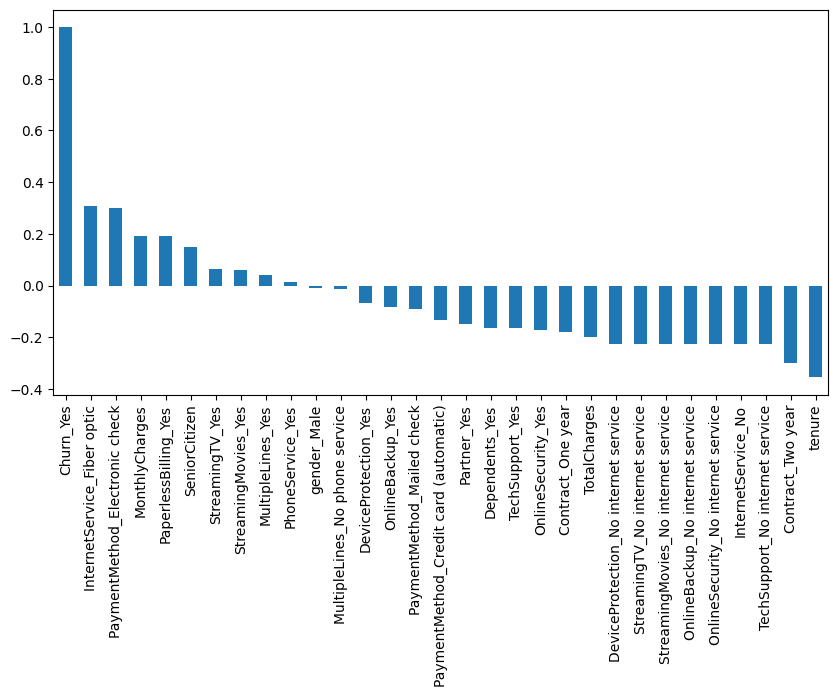

In [23]:
plt.figure(figsize=(10,5))
df.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

Now that we have our dummy variables, we can see the correlation to churn quantified in the image above, it appears that fiber optic internet service has the highest correlation to churn, this being in line with our exploratory analysis and implying that perhaps this service is not up to par with competitors. 

### Split and Scale

In [24]:
X = df.drop(['Churn_Yes'],axis=1)
Y = df['Churn_Yes']

We have split our data into training and test sets and now we can scale our X data using the MinMaxScaler. <br><br>
The MinMaxScaler will scale all of our independent features down to a range of 0-1. 

In [25]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df, columns=X.columns)
X.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [27]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (4922, 30)
The shape of X_test is: (2110, 30)
The shape of Y_train is: (4922,)
The shape of Y_test is: (2110,)


## Building Our Models

We are now ready to put together our models. 

For this project I will focus on four classification algorithms from the sklearn library : 
> * Logistic Regression
>* Support Vector Classifier
>* Decision Tree Classifier and
>* K-Neighbours Classifier
>* Random Forest Classifier

Before that lets build a function to plot the confusion matrix for each model as we go along for better visualization of our model performance. 

In [28]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Churn','No Churn']); ax.yaxis.set_ticklabels(['Churn','No Churn'])

### Logisitic Regression

In [29]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
accuracy = lr.score(X_test, Y_test)
print('Log Regression Accuracy:',(accuracy*100).round(2),'%')

Log Regression Accuracy: 79.53 %


Our Log Regression model gave us a preliminary accuracy score of 79.53%, which is not bad. Still, let's tune our model to see if we can improve on that number.

In [30]:
lr_params = {'C':[0.01,0.1,1],
             'penalty':['l1','l2','elasticnet'],
             'solver':['liblinear','lbfgs','newton-cg', 'sag', 'saga']}

logreg_cv = GridSearchCV(lr,lr_params,cv=5)
logreg_cv.fit(X_train, Y_train)
print("Best Parameters :",logreg_cv.best_params_)
print("GridSearch Score :",(logreg_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearch Score : 80.5 %


In [31]:
y_predict=logreg_cv.best_estimator_.predict(X_test)

print("Tuned Logistic Regression Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Logistic Regression Model Accuracy: 79.67 %


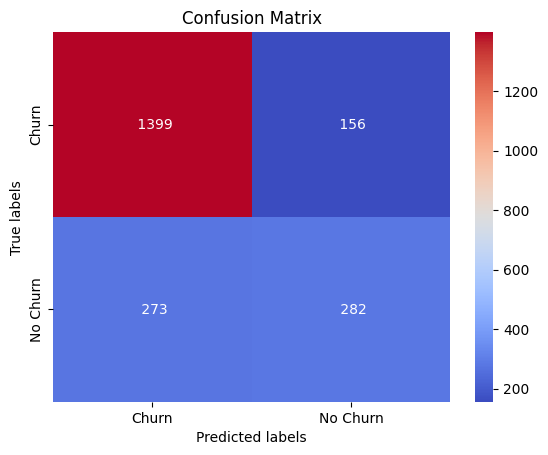

In [32]:
plot_confusion_matrix(Y_test,y_predict)

### Support Vector Machine

In [33]:
svm = SVC()
svm.fit(X_train,Y_train)
accuracy = svm.score(X_test, Y_test)
print('Support Vector Accuracy:',(accuracy*100).round(2),'%')

Support Vector Accuracy: 79.81 %


In [34]:
svm_params = {'C':[0.01,0.1,1],
              'kernel':['linear', 'rbf','poly','sigmoid'],
              'degree':[2,3,4,5],
              'decision_function_shape':['ovo', 'ovr'],
              'gamma':[0.01,0.1,1.0]}

svm_cv = GridSearchCV(svm,svm_params,cv=5)
start = time.time()
svm_cv.fit(X_train, Y_train)
end = time.time()
print(f'Execution time: {end - start:.2f} seconds')
print("Best Parameters :",svm_cv.best_params_)
print("GridSearch Score:",(svm_cv.best_score_*100).round(2),'%')

Execution time: 1087.11 seconds
Best Parameters : {'C': 1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
GridSearch Score: 80.29 %


In [35]:
y_predict=svm_cv.best_estimator_.predict(X_test)

print("Tuned SVM Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned SVM Model Accuracy: 79.91 %


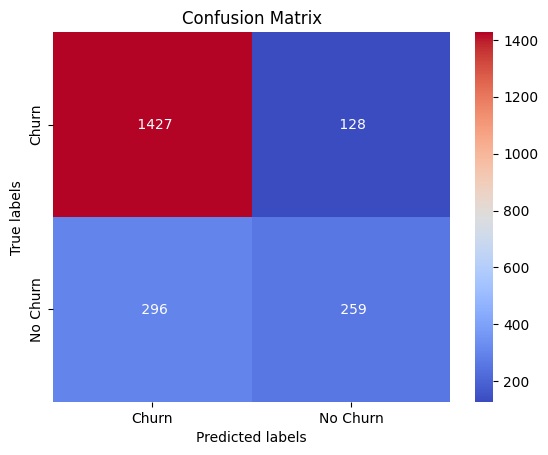

In [36]:
plot_confusion_matrix(Y_test,y_predict)

### Decision Tree Classifier

In [37]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
accuracy = tree.score(X_test, Y_test)
print('Decision Tree Accuracy:',(accuracy*100).round(2),'%')

Decision Tree Accuracy: 71.66 %


In [38]:
tree_params = {'criterion':['gini','entropy','log_loss'],
               'splitter': ['best', 'random'],
               'max_depth': ['None',2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16],
               'max_features': ['auto', 'sqrt','log2']}

tree_cv = GridSearchCV(tree,tree_params,cv=5)
start = time.time()
tree_cv.fit(X_train, Y_train)
end = time.time()
print(f'Execution time: {end - start:.2f} seconds')
print("Best Parameters :",tree_cv.best_params_)
print("GridSearch Score :",(tree_cv.best_score_*100).round(2),'%')

Execution time: 808.16 seconds
Best Parameters : {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 8, 'splitter': 'best'}
GridSearch Score : 79.99 %


In [39]:
y_predict = tree_cv.best_estimator_.predict(X_test)
print("Tuned Decision Tree Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Decision Tree Model Accuracy: 78.2 %


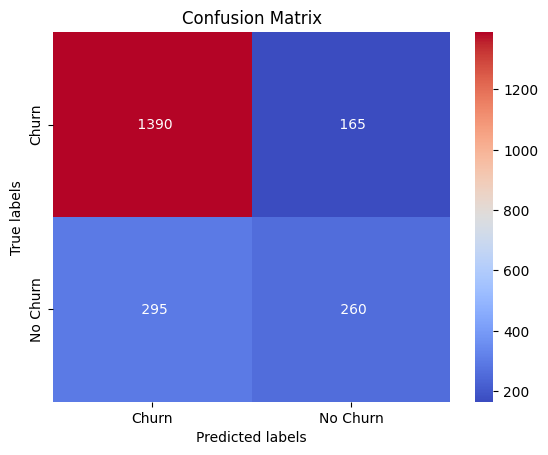

In [40]:
plot_confusion_matrix(Y_test,y_predict)

### K-Neighbors Classifier

In [41]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
accuracy = KNN.score(X_test, Y_test)
print('KNN Model Accuracy:',(accuracy*100).round(2),'%')

KNN Model Accuracy: 75.36 %


In [42]:
knn_params = {'n_neighbors': list(range(1,50)),
              'weights':['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Score :",(knn_cv.best_score_*100).round(2),'%')

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 28, 'p': 2, 'weights': 'uniform'}
GridSearch Score : 79.72 %


In [43]:
y_predict=knn_cv.best_estimator_.predict(X_test)

print("Tuned K-Neighbors model accuracy:", 
     ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned K-Neighbors model accuracy: 78.63 %


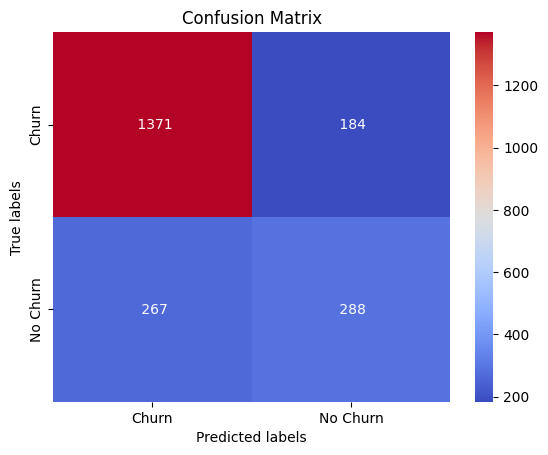

In [44]:
plot_confusion_matrix(Y_test,y_predict)

### Random Forest Classifier

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# end = time.time()
r2 = rfc.score(X_test,Y_test)
print('Random Forest Classifier Accuracy =',(r2*100).round(2),'%')

Random Forest Classifier Accuracy = 78.86 %


In [46]:
rfc_params = {'n_estimators':[1,10,50,100,150,200,250,300],
             'criterion':['gini', 'entropy', 'log_loss'], 
             'max_features':['sqrt', 'log2', None],
             'n_jobs':[-1, 1, None],
             'random_state':[2,4,6,8,10]}
start = time.time()
rfc_cv = GridSearchCV(rfc,rfc_params,cv=5,scoring='r2')
rfc_cv.fit(X_train, Y_train)
end = time.time()
print(f'Execution time: {end - start:.2f} seconds')
print("Best Parameters :",rfc_cv.best_params_)

Execution time: 4266.26 seconds
Best Parameters : {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200, 'n_jobs': -1, 'random_state': 2}


In [47]:
y_predict=rfc_cv.best_estimator_.predict(X_test)

print("Tuned Random Forest Classifier Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Random Forest Classifier Model Accuracy: 78.91 %


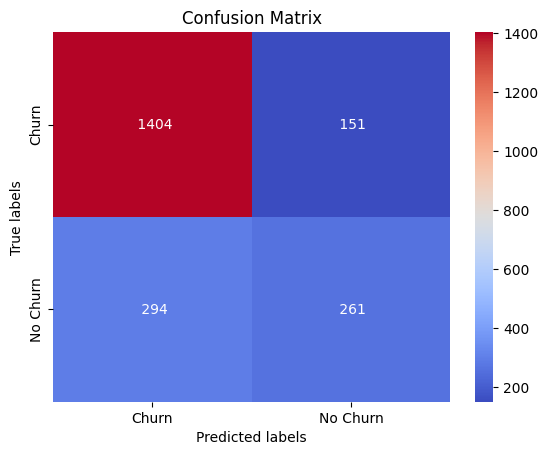

In [48]:
plot_confusion_matrix(Y_test,y_predict)

## Conclusion

In [54]:
mods = {'LogReg':[lr.score(X_test, Y_test), logreg_cv.best_estimator_.score(X_test, Y_test)],
        'SVM':[svm.score(X_test,Y_test),svm_cv.best_estimator_.score(X_test, Y_test)],
        'Tree':[tree.score(X_test,Y_test),tree_cv.best_estimator_.score(X_test, Y_test)],
        'KNN':[KNN.score(X_test,Y_test),knn_cv.best_estimator_.score(X_test, Y_test)],
        'RFC':[rfc.score(X_test,Y_test),rfc_cv.best_estimator_.score(X_test,Y_test)]}
scores = pd.DataFrame.from_dict(mods,orient='index', columns=['Initial Model','Tuned Model'])
scores.style.highlight_max(color = 'yellow', axis = 0)

,Initial Model,Tuned Model
LogReg,0.795261,0.796682
SVM,0.798104,0.799052
Tree,0.716588,0.781991
KNN,0.753555,0.786256
RFC,0.788626,0.789100


Now that we have finished building our models, we can see that our best option for predicting customer churn is the Support Vector Classifier model which had the highest accuracy at 79.91 %. <br><br> Now lets take a look at which features were most relevant in our model to better understand how to address churn. 

In [50]:
perm_importance = permutation_importance(svm, X_test, Y_test)
perm_importances = pd.DataFrame((perm_importance.importances_mean), index=X.columns, columns=['importance'])
perm_importances.sort_values(by = 'importance', ascending = False, inplace = True)

perm_importances.head()

,importance
InternetService_Fiber optic,0.030995
tenure,0.028531
Contract_One year,0.010142
TotalCharges,0.008057
MultipleLines_Yes,0.007583


In [55]:
perm_importances.tail()

,importance
MultipleLines_No phone service,2.220446e-17
PhoneService_Yes,2.220446e-17
Partner_Yes,-2.843602e-04
PaymentMethod_Mailed check,-5.687204e-04
Dependents_Yes,-3.601896e-03


Right away we can see that tenure and fiber optic internet service are the two most important factors in a customers decision on whether or not to churn. Whether said customer has a partner or any dependents is pretty much irrelevant. <br><br> Fiber optic internet being one of the most two important factors is in line with our initial assumptions derived from our exploratory analysis, although our initial correlation plot shows that tenure isn't important which isn't true.<br><br>
Our analysis showed that new customers are likelier to churn and it appears that fiber optic internet service is the main reason for this. This company would do good by improving this service and/or focusing more on marketing DSL internet service to current and potential customers as this seems to lead to much higher customer satisfaction. 